# Covid-19 - India Reports

# Global Pandemic

With China reporting more than 70k cases of the virus and cases being reported from over 100 countries icluding the USA, Australia, Cambodia, Canada, Italy, Japan, France, Malaysia, Japan, South Korea, Thailand, etc.. with a global total of confirmed cases being 182,997 the World Health Organization has declared the crisis as a Pandemic. Furthermore, 7,174 people have already died due to this deadly viral infection. 

## India Reports

In several cities, many people having symptoms of the virus infection are kept under observation in hospitals. According to WHO till the 17th of March a total of 129 COVID-19 cases have been reported in India. They include 112 Indian nationals, 17 foreign nationals, 10 recovered and 2 deaths. State-wise cases of COVID-19 have been reported from 13 States/UTs: Andhra Pradesh (1 case), Delhi (7 cases), Haryana (14 cases), Jammu & Kashmir (2 cases), Karnataka (6 cases), Kerala (24 cases), Ladakh (3 cases), Maharashtra (33 cases), Punjab (1 case), Rajasthan (4 cases), Telangana (3 cases), Tamil Nadu (1 case), Uttar Pradesh (12 cases) and Odisha (1 case).

**The Govt. helpline number: 011-239 78046, will remain operational. Besides the toll-free numbers,the ministry also issued a helpline email ID - ncov2019@gmail.com.**

Read more at:
https://economictimes.indiatimes.com/news/politics-and-nation/health-ministry-launches-new-toll-free-number-email-id-for-queries-on-covid-19/articleshow/74661190.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


## Previous Work on Covid-19
1. https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-geo-statistical-analysis
2. https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-geographical-analysis

In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/coronavirus-cases-in-india/per_day_cases.xlsx
/kaggle/input/coronavirus-cases-in-india/Covid cases in India.csv
/kaggle/input/coronavirus-cases-in-india/Indian Coordinates.csv
/kaggle/input/indian-state-geojson-data/india_state_geo.json
/kaggle/input/covid19-corona-virus-india-dataset/complete.csv
/kaggle/input/covid19-corona-virus-india-dataset/web_scraping.ipynb
/kaggle/input/covid19-corona-virus-india-dataset/patients_data.csv
/kaggle/input/covid19-corona-virus-india-dataset/patient_wise_data_scrapping_and_cleaning.ipynb


In [113]:
# import the necessary libraries

import numpy as np 
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot, download_plotlyjs
import plotly as ply
import pycountry
import folium 
from folium import plugins
import json


%config InlineBackend.figure_format = 'retina'
init_notebook_mode(connected=True)

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# India Latitude Longitude
India_Latitude = 21.7679
India_Longitude = 78.8718 

In [114]:
# Utility Functions

'''Display markdown formatted output like bold, italic bold etc.'''
def formatted_text(string):
    display(Markdown(string))


'''highlight the maximum in a Series or DataFrame'''  
def highlight_max(data, color='red'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
    


# Utility Plotting Functions

def plotDailyReportedCasesOverTime(df, country):
    # confirmed
    fig = px.bar(df, x="Date", y="Confirmed")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of confirmed cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Confirmed cases")

    fig.update_layout(layout)
    fig.show()

    # deaths
    fig = px.bar(df, x="Date", y="Deaths")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of reported deaths in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Deaths Reported")

    fig.update_layout(layout)
    fig.show()

    # recovered
    fig = px.bar(df, x="Date", y="Recovered")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of recovered cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Recovered Cases")

    fig.update_layout(layout)
    fig.show()
    
# Cases over time
def scatterPlotCasesOverTime(df, country):
    plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered"))

    subPlot1 = go.Scatter(
                    x=df['Date'],
                    y=df['Confirmed'],
                    name="Confirmed",
                    line_color='orange',
                    opacity=0.8)

    subPlot2 = go.Scatter(
                    x=df['Date'],
                    y=df['Deaths'],
                    name="Deaths",
                    line_color='red',
                    opacity=0.8)

    subPlot3 = go.Scatter(
                    x=df['Date'],
                    y=df['Recovered'],
                    name="Recovered",
                    line_color='green',
                    opacity=0.8)

    plot.append_trace(subPlot1, 1, 1)
    plot.append_trace(subPlot2, 1, 2)
    plot.append_trace(subPlot3, 1, 3)
    plot.update_layout(template="ggplot2", title_text = country + '<b> - Spread of the nCov Over Time</b>')

    plot.show()

 ## Daywise numbers of the cases reported

In [115]:
covid_19_India = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
population_India_census2011 = pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")

covid19_complete = pd.read_csv('../input/covid19-corona-virus-india-dataset/complete.csv', parse_dates=['Date'])

covid_19_India.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [116]:
# covid_19_India['Confirmed'] = covid_19_India['ConfirmedIndianNational'] + covid_19_India['ConfirmedForeignNational']
covid_19_India.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)

covid_19_India.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Recovered,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


## Statewise Covid-19 Cases...

In [117]:
covid_India_cases = pd.read_csv('../input/coronavirus-cases-in-india/Covid cases in India.csv')

# Coordinates of Indian States
India_Lat_Lon = pd.read_csv('../input/coronavirus-cases-in-india/Indian Coordinates.csv')

# Day by day data
dbd_India = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name='India')
dbd_Italy = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name="Italy")
dbd_Korea = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name="Korea")

covid_India_cases.head()

,S. No.,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths
0,2,Andaman and Nicobar Islands,10,0,0
1,1,Andhra Pradesh,40,1,0
2,3,Bihar,15,0,1
3,4,Chandigarh,13,0,0
4,5,Chattisgarh,8,0,0


In [118]:
covid_India_cases.rename(columns={'Name of State / UT': 'State', 'Cured/Discharged/Migrated': 'Recovered', 'Total Confirmed cases': 'Confirmed'}, inplace=True)

# covid_India_cases['Confirmed'] = covid_India_cases['Total Confirmed cases (Indian National)'] + covid_India_cases['Total Confirmed cases ( Foreign National )']

# Active Case = confirmed - deaths - recovered
covid_India_cases['Active'] = covid_India_cases['Confirmed'] - covid_India_cases['Deaths'] - covid_India_cases['Recovered']

covid_India_cases.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
            .background_gradient(cmap="Greens", subset=['Recovered'])\
            .background_gradient(cmap="Reds", subset=['Deaths'])

,S. No.,State,Confirmed,Recovered,Deaths,Active
0,2,Andaman and Nicobar Islands,10,0,0,10
1,1,Andhra Pradesh,40,1,0,39
2,3,Bihar,15,0,1,14
3,4,Chandigarh,13,0,0,13
4,5,Chattisgarh,8,0,0,8
5,6,Delhi,97,6,2,89
6,7,Goa,5,0,0,5
7,8,Gujarat,73,3,6,64
8,9,Haryana,40,21,0,19
9,10,Himachal Pradesh,3,0,1,2


In [119]:
fig = px.bar(covid_India_cases.sort_values('Confirmed', ascending=False).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="State", title='Total Confirmed Cases', text='Confirmed', orientation='h', 
             width=16*(max(covid_India_cases['Confirmed']) + 2), height=700, range_x = [0, max(covid_India_cases['Confirmed']) + 2])
fig.update_traces(marker_color='#0726ed', opacity=0.8, textposition='outside')

fig.update_layout(plot_bgcolor='rgb(208, 236, 245)')
fig.show()

**The above state-wise data and the plot show that Kerela and Maharashtra are the 2 worst affected states in the country followed by Karnataka, Uttar Pradesh, Telengana, Rajasthan. 
As the numbers in these states are increasing and India entering it's 3rd week/phase of the spread we could possibly think (though still early to say) in terms of the community level spread.**

****Now lets see the spread day wise. India reported it's first case on 30th January. Post that for a long period of time for almost a month we did not see any rise in the cases being reported. The numbers have started to increase from the starting of March.****

# Foreign vs Indian Cases...

In [120]:
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Indian Cases","Foreign Cases"))

# # Indian Nationals
# Indian = covid_India_cases.sort_values('Total Confirmed cases (Indian National)', ascending=False).sort_values('Total Confirmed cases (Indian National)', ascending=False)

# fig.add_trace(go.Bar( y=Indian['Total Confirmed cases (Indian National)'], x=Indian["State"],  
#                      marker=dict(color=Indian['Total Confirmed cases (Indian National)'], coloraxis="coloraxis")), 1, 1)

# # Foreign Nationals
# foreign = covid_India_cases.sort_values('Total Confirmed cases ( Foreign National )', ascending=False).sort_values('Total Confirmed cases ( Foreign National )', ascending=False)

# fig.add_trace(go.Bar( y=foreign['Total Confirmed cases ( Foreign National )'], x=foreign["State"], 
#                      marker=dict(color=foreign['Total Confirmed cases ( Foreign National )'], coloraxis="coloraxis")), 1, 2)                     
                     

# fig.update_layout(coloraxis=dict(colorscale='hsv'), showlegend=False,title_text="Indian vs Foreign Cases",plot_bgcolor='rgb(255, 255, 255)')
# fig.show()

In [121]:
covid_19_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 9 columns):
Sno                         587 non-null int64
Date                        587 non-null object
Time                        587 non-null object
State                       587 non-null object
ConfirmedIndianNational     587 non-null object
ConfirmedForeignNational    587 non-null object
Recovered                   587 non-null int64
Deaths                      587 non-null int64
Confirmed                   587 non-null int64
dtypes: int64(4), object(5)
memory usage: 41.4+ KB


In [122]:
# covid_19_India['Confirmed'] = covid_19_India['Confirmed'].replace('--', 0)
# covid_19_India['Confirmed'] = pd.to_numeric(covid_19_India['Confirmed'], errors='coerce', downcast='integer')

# covid_19_India.head()

In [123]:
temp = covid_19_India[["Date","Confirmed","Deaths","Recovered"]]
temp['Date'] = temp['Date'].apply(pd.to_datetime, dayfirst=True)

date_wise_data = temp.groupby(["Date"]).sum().reset_index()

formatted_text('***Day wise distribution for Confirmed, Deaths and Recovered Cases***')
# pd.set_option('display.max_rows', 100) 
date_wise_data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



***Day wise distribution for Confirmed, Deaths and Recovered Cases***

,Date,Confirmed,Deaths,Recovered
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0
5,2020-02-04,3,0,0
6,2020-02-05,3,0,0
7,2020-02-06,3,0,0
8,2020-02-07,3,0,0
9,2020-02-08,3,0,0


### Reported Confirmed, Deaths and Recovered cases over time...

In [124]:
temp = date_wise_data.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
# temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.show()

# Treemap View...

In [125]:
statewise_cases = pd.DataFrame(covid_India_cases.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" # in order to have a single root node
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',
                  color='Confirmed', hover_data=['State'],
                  color_continuous_scale='RdBu')
fig.show()

In [126]:
# Load the Indian state geo json file

# with open('../input/indian-state-geojson-data/india_state_geo.json') as file:
#     ind_geo = json.load(file)

# India_conf_choropleth = go.Figure(go.Choroplethmapbox(geojson=ind_geo, locations=Covid_India_With_Location['State'],
#                                                       z=Covid_India_With_Location['TotalConfirmed'], colorscale='Sunset',
#                                                       zmin=0, zmax=max(Covid_India_With_Location.TotalConfirmed), marker_opacity=0.5, marker_line_width=0))

# India_conf_choropleth.update_layout(mapbox_style="carto-positron", mapbox_zoom=3.5, 
#                                     mapbox_center = {"lat": India_Latitude, "lon": India_Longitude})

# India_conf_choropleth.update_layout(margin={"r":10,"t":0,"l":10,"b":0})

# iplot(India_conf_choropleth)



In [127]:
# Affected States

nCoV_States = covid_19_India['State'].unique().tolist()
print('\n')
print(nCoV_States)
print("\n------------------------------------------------------------------")
print("\nTotal States affected by nCoV: ",len(nCoV_States))



['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Pondicherry', 'West Bengal', 'Chattisgarh', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Puducherry', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand']

------------------------------------------------------------------

Total States affected by nCoV:  32


***Confirmed Cases vs Day***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text xticklabel objects>)

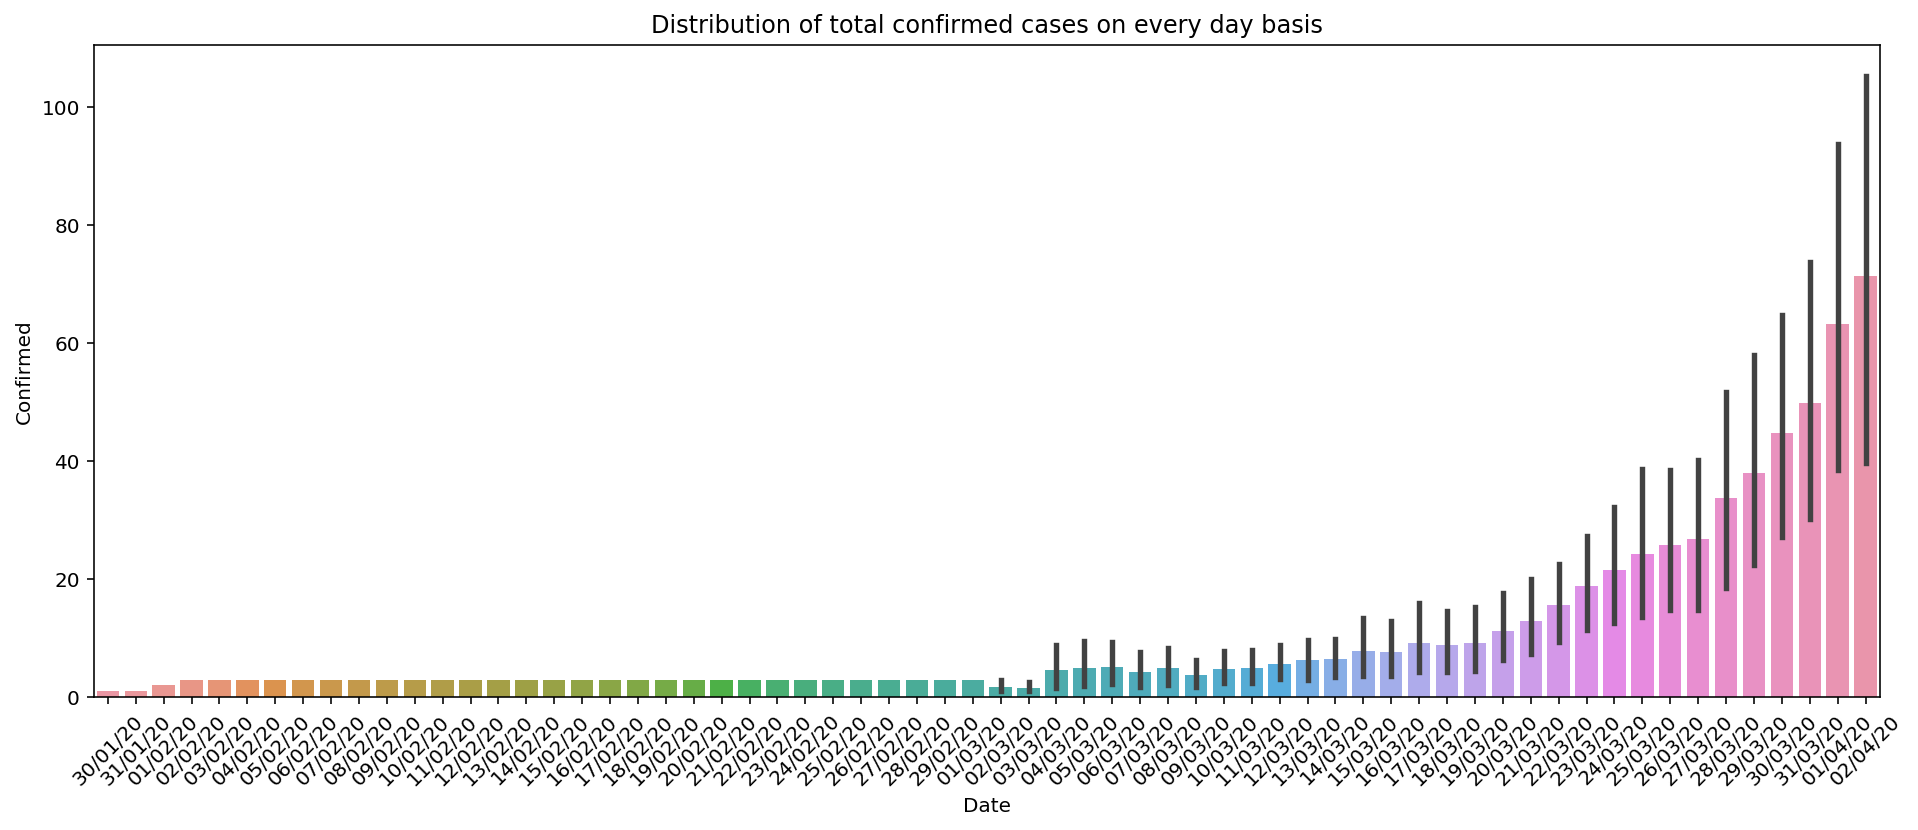

In [128]:
formatted_text('***Confirmed Cases vs Day***')
plt.figure(figsize=(16,6))
sns.barplot(x='Date',y='Confirmed',data=covid_19_India, order=covid_19_India.Date.unique().tolist())
plt.title('Distribution of total confirmed cases on every day basis')
plt.xticks(rotation=45)

# India Spread Over Time...

In [129]:
# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.

scatterPlotCasesOverTime(date_wise_data, "<b>India</b>")

In [130]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(date_wise_data, "INDIA")

In [131]:
covid19_complete.columns

Index(['Date', 'Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )',
       'Cured/Discharged/Migrated', 'Latitude', 'Longitude', 'Death',
       'Total Confirmed cases'],
      dtype='object')

In [132]:
covid19_complete.rename(columns={'Name of State / UT': 'State_UT', 'Cured/Discharged/Migrated': 'Recovered', 'Total Confirmed cases': 'Confirmed', 'Death': 'Deaths'}, inplace=True)

for i in ['Confirmed', 'Deaths', 'Recovered']:
    covid19_complete[i] = covid19_complete[i].astype('int')

# Derived Columns
covid19_complete['Active'] = covid19_complete['Confirmed'] - covid19_complete['Deaths'] - covid19_complete['Recovered']
covid19_complete['Mortality_rate(%)'] = covid19_complete['Deaths']/covid19_complete['Confirmed'] * 100
covid19_complete['Recovery_rate(%)'] = covid19_complete['Recovered']/covid19_complete['Confirmed'] * 100

covid19_complete = covid19_complete[['Date', 'State_UT', 'Latitude', 'Longitude', 'Confirmed', 'Active', 'Recovered', 'Deaths', 'Recovery_rate(%)', 'Mortality_rate(%)']]

covid19_complete.head()

,Date,State_UT,Latitude,Longitude,Confirmed,Active,Recovered,Deaths,Recovery_rate(%),Mortality_rate(%)
0,2020-01-30,Kerala,10.8505,76.2711,1,1,0,0,0.0,0.0
1,2020-01-31,Kerala,10.8505,76.2711,1,1,0,0,0.0,0.0
2,2020-02-01,Kerala,10.8505,76.2711,2,2,0,0,0.0,0.0
3,2020-02-02,Kerala,10.8505,76.2711,3,3,0,0,0.0,0.0
4,2020-02-03,Kerala,10.8505,76.2711,3,3,0,0,0.0,0.0


### Latest Data

In [133]:
# Get the latest data
latest_day = max(covid19_complete['Date'])
day_before = latest_day - timedelta(days = 1)

# state wise data and new cases reported in the last day
latest_day_data = covid19_complete[covid19_complete['Date']==latest_day].set_index('State_UT')
day_before_data = covid19_complete[covid19_complete['Date']==day_before].set_index('State_UT')

temp = pd.merge(left = latest_day_data, right = day_before_data, on='State_UT', suffixes=('_latest_day', '_previous_day'), how='outer')

# Get the number of new cases reported in the last day
latest_day_data['New_cases_reported'] = temp['Confirmed_latest_day'] - temp['Confirmed_previous_day']
latest = latest_day_data.reset_index()
latest.fillna(1, inplace=True)

temp = latest[['State_UT', 'Confirmed', 'Active', 'New_cases_reported','Recovered', 'Deaths', 'Recovery_rate(%)', 'Mortality_rate(%)']]
temp = temp.sort_values('Confirmed', ascending=False).reset_index(drop=True)

temp.style\
    .background_gradient(cmap="Blues", subset=['Confirmed', 'Active', 'New_cases_reported'])\
    .background_gradient(cmap="Greens", subset=['Recovered', 'Recovery_rate(%)'])\
    .background_gradient(cmap="Reds", subset=['Deaths', 'ortality_rate(%)'])

,State_UT,Confirmed,Active,New_cases_reported,Recovered,Deaths,Recovery_rate(%),Mortality_rate(%)
0,Maharashtra,335,277,0,42,16,12.5373,4.77612
1,Tamil Nadu,309,302,75,6,1,1.94175,0.323625
2,Kerala,286,257,21,27,2,9.44056,0.699301
3,Delhi,219,207,67,8,4,3.65297,1.82648
4,Rajasthan,133,130,25,3,0,2.25564,0
5,Andhra Pradesh,132,130,46,1,1,0.757576,0.757576
6,Karnataka,124,111,14,10,3,8.06452,2.41935
7,Uttar Pradesh,113,97,0,14,2,12.3894,1.76991
8,Telengana,107,103,11,1,3,0.934579,2.80374
9,Madhya Pradesh,99,93,0,0,6,0,6.06061


In [172]:
ordered_latest = latest.sort_values('Confirmed', ascending=False)
# state_order = temp['State/UT']

fig = px.bar(latest.sort_values('Confirmed', ascending=False), 
             x="Confirmed", y="State_UT", color='State_UT', title='Confirmed',
             orientation='h', text='Confirmed', height=700,
             color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

In [150]:
date_wise_data = covid19_complete[["Date", 'State_UT', "Confirmed","Deaths","Recovered",'Active']]
date_wise_data['Date'] = date_wise_data['Date'].apply(pd.to_datetime, dayfirst=True)
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
temp = date_wise_data.copy()
temp['Recovery_rate(%)'] = temp['Recovered']/temp['Confirmed']*100
temp['Mortality_rate(%)'] = temp['Deaths']/temp['Confirmed']*100

In [152]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovery_rate(%)'],
                    mode='lines+markers',marker_color='green'))
fig.update_layout(title_text = 'Cummulative Recovery Rate of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [155]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Mortality_rate(%)'],
                    mode='lines+markers',marker_color='red'))
fig.update_layout(title_text = 'Cummulative Mortality Rate of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

## Age wise trend...

In [156]:
agegroup_data = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
agegroup_data.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [157]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=agegroup_data['AgeGroup'],y=agegroup_data['TotalCases'],line_shape='spline',fill='tonexty',fillcolor = 'orange')) 
fig.update_layout(title="Age wise Trend...",yaxis_title="Total Number of cases",xaxis_title="Age Group")
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=800,height=600)
fig.show()

In [199]:
temp = agegroup_data.copy()
temp['Percentage'] = temp['Percentage'].str.rstrip('%')
temp['Percentage'] = pd.to_numeric(temp['Percentage'])
temp.reset_index()
temp.set_index(["AgeGroup"], inplace = True, append = False, drop = True) 
temp

,Sno,TotalCases,Percentage
AgeGroup,,,
0-9,1,22,3.18
10-19,2,27,3.90
20-29,3,172,24.86
30-39,4,146,21.10
40-49,5,112,16.18
50-59,6,77,11.13
60-69,7,89,12.86
70-79,8,28,4.05
>=80,9,10,1.45


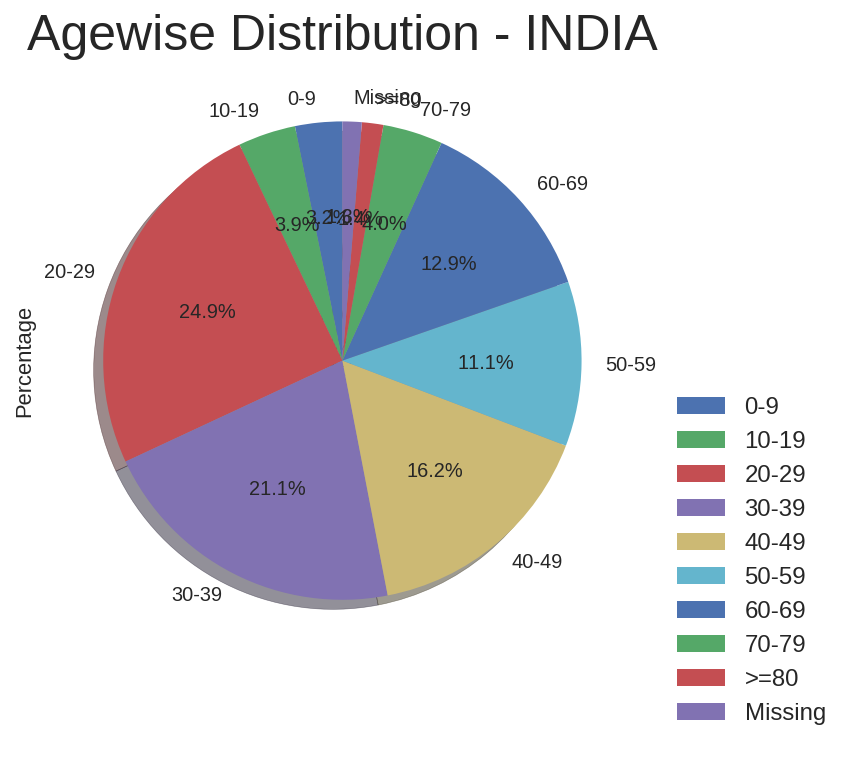

In [201]:

plt.figure(figsize=(12,12))

temp['Percentage'].plot( kind='pie'
           , autopct='%1.1f%%'
           , shadow=True
           , startangle=90)

plt.title('Agewise Distribution - INDIA',size=25)
plt.legend(loc = "best"
           , fontsize = 12
           , ncol = 1 
           , fancybox = True
           , framealpha = 0.80
           , shadow = True
           , borderpad = 1
           , bbox_to_anchor=(1,0.5));

# On the Map...

In [134]:
India = folium.Map(location = [India_Latitude,India_Longitude], min_zoom=4, max_zoom=6, zoom_start=5, tiles = 'cartodbpositron')

for lat, long, confirmed, active, deaths, recovered, state in zip(latest['Latitude'],
                                                           latest['Longitude'],
                                                           latest['Confirmed'],
                                                           latest['Active'],
                                                           latest['Deaths'],
                                                           latest['Recovered'], 
                                                           latest['State_UT']):

    if (deaths == 0):
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Active:</strong> ' + str(int(active)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(55, 83, 109)').add_to(India)

    else:
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Active:</strong> ' + str(int(active)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(26, 118, 255)').add_to(India)
        
India


An initial level analysis. This will be updated ...